# Processing Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv

In [2]:
df: pd.DataFrame = pd.read_csv("neutron15x15.csv")
df.head()

,vx,vy,vz,sci_photons,xpos0,ypos0,photons0,xpos1,ypos1,photons1,xpos2,ypos2,photons2,xpos3,ypos3,photons3
0,-3.42207,-3.34777,6.57411,241,-99.9,-99.9,-1,-15.0,15.0,1,15.0,-15.0,1,-99.9,-99.9,-1
1,4.74793,-3.08174,-5.66328,22366,-15.0,-15.0,46,-15.0,15.0,30,15.0,-15.0,64,15.0,15.0,44
2,-11.88880,10.43710,1.05466,6991,-15.0,-15.0,16,-15.0,15.0,50,15.0,-15.0,7,15.0,15.0,16
3,-2.23349,-5.00347,5.21215,87,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1
4,-4.14242,10.04060,7.70091,68,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1,15.0,15.0,1


## Make basic scatterplot to check

Text(0.5, 1.0, 'Scatterplot of event locations')

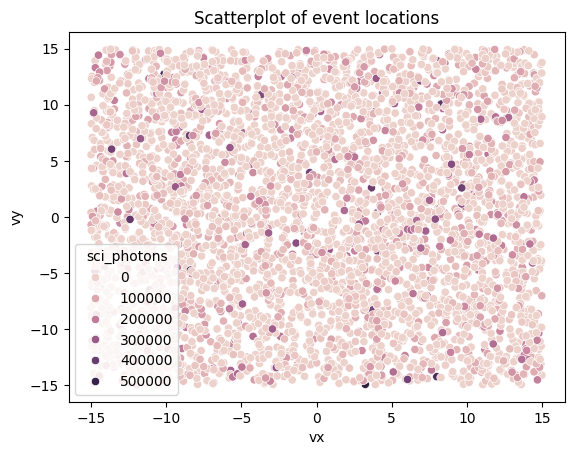

In [3]:
sns.scatterplot(data=df,x='vx',y='vy',hue="sci_photons")
plt.title("Scatterplot of event locations")

## Count instances of no photons being detected

In [4]:
tmp = np.zeros_like(df['photons0'],dtype=int)
nx = 2
ny = 2
n = nx * ny
for i in range(n):
    tmp += (df[f'photons{i}'] < 0)

NOPHOTONS = tmp == n

print("Number of rows with no detected photons:",sum(NOPHOTONS))
print("Number of rows with detectd photons:",sum(~NOPHOTONS))
print("Efficiency:",sum(~NOPHOTONS)/len(df["photons0"]))

Number of rows with no detected photons: 935
Number of rows with detectd photons: 3062
Efficiency: 0.7660745559169377


## Dynamically determine which columns are right or left and up or down

In [5]:
left_dropnames = [] # Columns to drop to get left subset
right_dropnames = [] # Columns to drop to get right subset
up_dropnames = [] # Columns to drop to get up subset
down_dropnames = [] # Columns to drop to get down subset
nx = 2
ny = 2
num = 0
for i in range(nx):
    for j in range(ny):
        if i < (nx / 2):
            print("left:",num)
            right_dropnames.append(f"photons{num}")
            right_dropnames.append(f"ypos{num}")
            right_dropnames.append(f"xpos{num}")
        else:
            print("right",num)
            left_dropnames.append(f"photons{num}")
            left_dropnames.append(f"ypos{num}")
            left_dropnames.append(f"xpos{num}")

        if j < (ny / 2):
            print("down:",num)
            up_dropnames.append(f"photons{num}")
            up_dropnames.append(f"ypos{num}")
            up_dropnames.append(f"xpos{num}")
        else:
            print('up:',num)
            down_dropnames.append(f"photons{num}")
            down_dropnames.append(f"ypos{num}")
            down_dropnames.append(f"xpos{num}")

        df = df[df[f'photons{num}'] != -1]
        num += 1

left: 0
down: 0
left: 1
up: 1
right 2
down: 2
right 3
up: 3


In [6]:
left: pd.DataFrame = df.drop(left_dropnames,axis=1)
right: pd.DataFrame = df.drop(right_dropnames,axis=1)
up: pd.DataFrame = df.drop(up_dropnames,axis=1)
down: pd.DataFrame = df.drop(down_dropnames,axis=1)

In [7]:
n = nx * ny

left['total'] = np.zeros_like(left['vx']).astype(int)
right["total"] = np.zeros_like(right['vx']).astype(int)
up['total'] = np.zeros_like(up['vx']).astype(int)
down['total'] = np.zeros_like(down['vx']).astype(int)
df["total"] = np.zeros_like(df['vx']).astype(int)
for i in range(n):
    # LEFT AND RIGHT
    try:
        left['total'] = left['total'] + left[f"photons{i}"]
    except:
        pass
    try:
        right['total'] = right['total'] + right[f"photons{i}"]
    except:
        pass

    # UP AND DOWN
    try:
        up['total'] = up['total'] + up[f'photons{i}']
    except:
        pass
    try:
        down['total'] = down['total'] + down[f'photons{i}']
    except:
        pass

    df['total'] = df['total'] + df[f"photons{i}"]

df['total']

1        184
2         89
7         52
8         98
10        16
        ... 
3984     518
3989    2580
3992      11
3995    1592
3996     209
Name: total, Length: 2149, dtype: int64

Text(0, 0.5, 'vx')

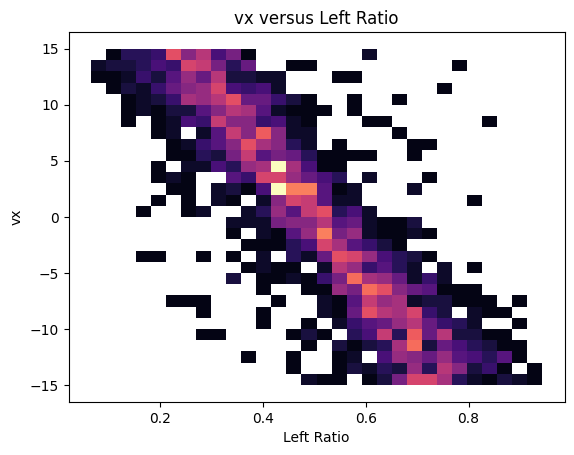

In [8]:
left_ratio = left['total']/df['total']
sns.histplot(y=df["vx"],x=left_ratio,cmap="magma",bins=30)
plt.title("vx versus Left Ratio")
plt.xlabel("Left Ratio")
plt.ylabel("vx")

Text(0.5, 0, 'vx')

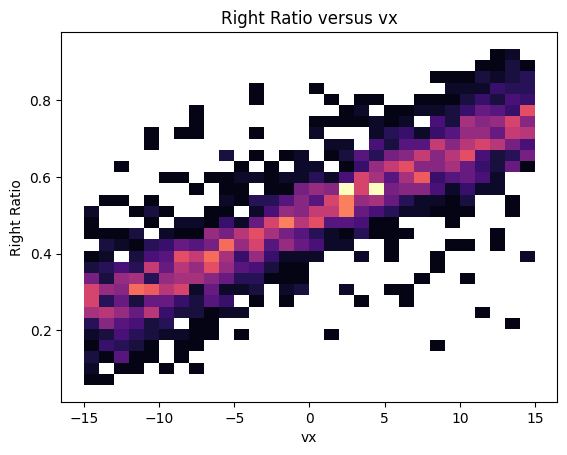

In [9]:
right_ratio = right['total']/df['total']
sns.histplot(x=df["vx"],y=right_ratio,cmap="magma",bins=30)
plt.title("Right Ratio versus vx")
plt.ylabel("Right Ratio")
plt.xlabel("vx")

Text(0.5, 0, 'vy')

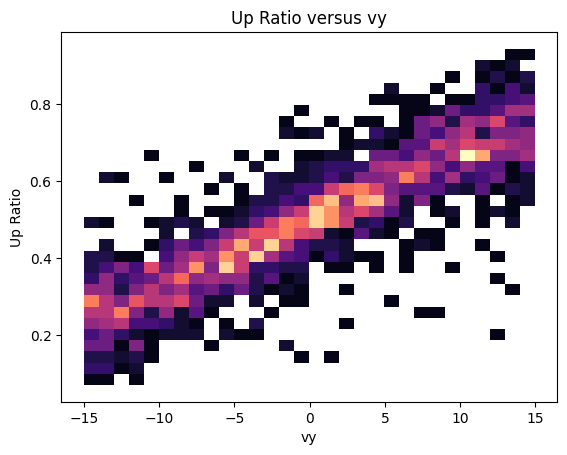

In [10]:
up_ratio = up['total']/df['total']
sns.histplot(x=df["vy"],y=up_ratio,cmap="magma",bins=30)
plt.title("Up Ratio versus vy")
plt.ylabel("Up Ratio")
plt.xlabel("vy")

Text(0.5, 0, 'vy')

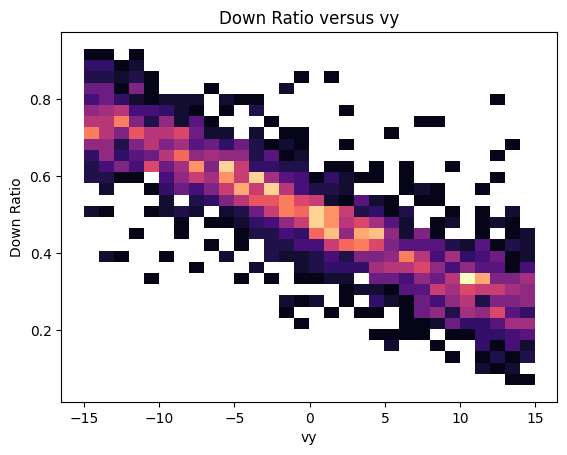

In [11]:
down_ratio = down['total']/df['total']
sns.histplot(x=df["vy"],y=down_ratio,cmap="magma",bins=30)
plt.title("Down Ratio versus vy")
plt.ylabel("Down Ratio")
plt.xlabel("vy")

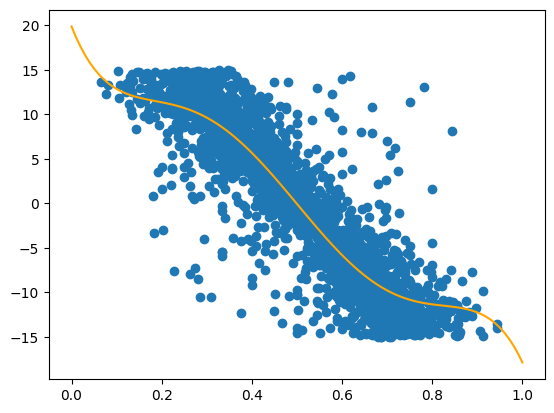

In [12]:
p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=5))
plt.scatter(left_ratio,left['vx'])
plt.plot(np.linspace(0,1,100),p(np.linspace(0,1,100)),c='orange')

In [13]:
for i in range(20):
    p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=i))
    pred = p(left_ratio)
    print(f"Deg = {i}, sd = {np.std(pred-left['vx'])}")

Deg = 0, sd = 8.674938289961311
Deg = 1, sd = 4.248953100784149
Deg = 2, sd = 4.248830331428213
Deg = 3, sd = 4.0587548108887805
Deg = 4, sd = 4.058744903488852
Deg = 5, sd = 4.042892975171217
Deg = 6, sd = 4.042892829454268
Deg = 7, sd = 4.042803678830947
Deg = 8, sd = 4.0427013271218915
Deg = 9, sd = 4.042049899149664
Deg = 10, sd = 4.04195916321174
Deg = 11, sd = 4.041916710636247
Deg = 12, sd = 4.0419166634493084
Deg = 13, sd = 4.041904046686611
Deg = 14, sd = 4.041852899225335
Deg = 15, sd = 4.040888427840776
Deg = 16, sd = 4.040886933814856
Deg = 17, sd = 4.0408589155169565
Deg = 18, sd = 4.040821181292861
Deg = 19, sd = 4.04075779838754


/var/folders/hx/46cwg7s936q1jf5vlcl6lwrh0000gn/T/ipykernel_12315/3915192284.py:2: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=i))
